In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

1294.368


,Year,Month,Day,Site,Zone,Plot,Location,Flag_Location,Location_Notes,Longitude,Flag_Longitude,Latitude,Flag_Latitude,Quadrat_Area,Species_Code,Shoot_Height,Flowering_Status,Plant_Biomass,Flag_Quadrat_Area,Date
0,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,110.0,0.0,21.016,NaN,2000-10-11
1,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,110.0,0.0,21.016,NaN,2000-10-11
2,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,80.0,0.0,11.824,NaN,2000-10-11
3,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,90.0,0.0,14.628,NaN,2000-10-11
4,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,140.0,1.0,46.288,NaN,2000-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62345,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,120.0,NaN,36.176,NaN,2019-10-05
62346,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,100.0,NaN,27.824,NaN,2019-10-05
62347,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,125.0,NaN,38.368,NaN,2019-10-05
62348,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,85.0,NaN,22.016,NaN,2019-10-05


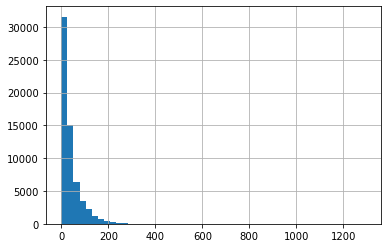

In [2]:
##import and concatenate datasets
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/Pennings'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Pennings' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

##Begin:
df['Plant_Biomass'] = df['Plant_Biomass']/df['Quadrat_Area'] ##adjust to grams/m^2

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# df = df[df['Species_Code'] == 'A1'] ##Remove all non-Spartina alterniflora plots - messes up unique coordinates section

df = df[df['Zone'] >= 0] ##Zone "-1" in 2013 needs to be addressed - refers to old plot location that was relocated

df['Plant_Biomass'].hist(bins = 50)
print(max(df['Plant_Biomass']))
df

In [3]:
#df['Plant_Biomass'].hist(by=df['Year'])

df2 = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).aggregate([np.mean, \
                                                                                np.size, np.std]).reset_index()

df3 = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).mean()

site_list = [7]
df4 = df[df['Site'].isin(site_list)]

list(df2) ##need to rename columns
df2
##site 7 seems to have the highest biomass

Plot Zone Site  Year Month            Day            ... Shoot_Height  \
                           mean size  std mean size  std  ...          std   
0       1    1    1  2000    10   23  0.0   11   23  0.0  ...    32.613438   
1       1    1    1  2001    10   18  0.0   17   18  0.0  ...    26.557682   
2       1    1    1  2002    10   16  0.0   16   16  0.0  ...    40.547709   
3       1    1    1  2004    10   18  0.0   25   18  0.0  ...    11.691151   
4       1    1    1  2005    10   25  0.0   24   25  0.0  ...    43.563173   
...   ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ...          ...   
3211   64    1    6  2018    10   15  0.0   12   15  0.0  ...    27.894359   
3212   64    1    6  2019    10    8  0.0    9    8  0.0  ...    22.903135   
3213   65    1    1  2017    10   26  0.0   14   26  0.0  ...    35.284013   
3214   65    1    1  2018    10   20  0.0   13   20  0.0  ...     9.930681   
3215   65    1    1  2019    10   14  0.0    4   14  0.0  ...    13.652879   

     Flowering_Status                 Plant_Biomass                   \
                 mean  size       std          mean  size        std   
0            0.260870  23.0  0.448978     22.448870  23.0  14.810154   
1            0.222222  18.0  0.427793     23.578667  18.0  14.448918   
2            0.125000  16.0  0.341565     16.236500  16.0  17.281629   
3            0.111111  18.0  0.323381     24.240667  18.0   6.073587   
4            0.280000  25.0  0.458258     25.972000  25.0  17.782706   
...               ...   ...       ...           ...   ...        ...   
3211         0.466667  15.0  0.516398     53.934933  15.0  25.034443   
3212         0.375000   8.0  0.517549     36.954500   8.0  16.904829   
3213         0.346154  26.0  0.485165     23.865538  26.0  17.260079   
3214         0.050000  20.0  0.223607     13.833800  20.0   4.350498   
3215         0.357143  14.0  0.497245     17.641714  14.0   7.858108   

     Flag_Quadrat_Area            
                  mean  size std  
0                  NaN  23.0 NaN  
1                  NaN  18.0 NaN  
2                  NaN  16.0 NaN  
3                  NaN  18.0 NaN  
4                  NaN  25.0 NaN  
...                ...   ...  ..  
3211               NaN  15.0 NaN  
3212               NaN   8.0 NaN  
3213               NaN  26.0 NaN  
3214               NaN  20.0 NaN  
3215               NaN  14.0 NaN  

[3216 rows x 31 columns]

In [4]:
dfx = df.groupby(['Site'], as_index = False).mean()
dfx = dfx[['Site', 'Longitude', 'Latitude']]
dfx
##lat/lon - these average lat/longs are used in GEE script! They are the points used in analysis. Lats/longs for \
##individual plots are shown in the df_plots dataframe below

,Site,Longitude,Latitude
0,1,-81.422318,31.539096
1,2,-81.295564,31.535967
2,3,-81.229141,31.518847
3,4,-81.365805,31.451791
4,5,-81.340722,31.435814
5,6,-81.280011,31.387962
6,7,-81.478498,31.334813
7,8,-81.415535,31.308242
8,9,-81.333707,31.351518
9,10,-81.270863,31.476948


In [5]:
##All coordinates (does not work if df is filtered to only Spartina alterniflora)
# longx = df['Longitude'].unique()
# latx = df['Latitude'].unique()

# unique_coordinates = pd.DataFrame(latx, longx)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(unique_coordinates)

In [6]:
##Unique values for dates - match with imagery in GEE
print(df['Year'].unique())
df_z = df.groupby('Year')['Day'].unique()

print(df_z)

##Locations of each plot, for each zone/site, on each sampling date
lat_x = df.groupby(['Year','Day', 'Site', 'Zone', 'Plot'], as_index=False)['Latitude'].mean()
# print(lat_x)

long_x = df.groupby(['Year','Day', 'Site', 'Zone', 'Plot'], as_index=False)['Longitude'].mean()
# print(long_x)

df_plots = pd.merge(lat_x, long_x)
print(df_plots) ##there is a better way of doing this than averaging - can you confirm?

[2000 2001 2002 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]
Year
2000    [11, 18, 10, 12, 13, 17, 16]
2001           [17, 15, 16, 8, 5, 9]
2002    [16, 18, 20, 15, 19, 14, 17]
2004                [25, 22, 24, 23]
2005        [24, 27, 22, 26, 21, 23]
2006                [16, 17, 15, 14]
2007            [22, 23, 24, 21, 20]
2008                [27, 28, 26, 25]
2009                [16, 15, 17, 14]
2010                [19, 20, 21, 18]
2011                [25, 27, 24, 26]
2012                [13, 14, 15, 12]
2013            [16, 18, 13, 15, 14]
2014        [17, 16, 18, 20, 21, 15]
2015    [20, 22, 25, 21, 15, 23, 24]
2016            [26, 25, 23, 24, 27]
2017        [14, 18, 19, 23, 16, 20]
2018    [13, 17, 14, 19, 12, 15, 16]
2019             [4, 11, 9, 8, 7, 5]
Name: Day, dtype: object
      Year  Day  Site  Zone  Plot   Latitude  Longitude
0     2000   10     4     1     1  31.451676 -81.365498
1     2000   10     4     1     2  31.451548 -81.365560
2

<AxesSubplot:xlabel='Date', ylabel='Plant_Biomass'>

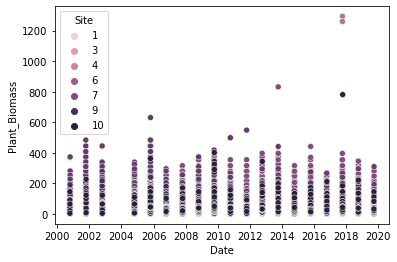

In [7]:
sns.scatterplot( x = 'Date', y = 'Plant_Biomass', hue = 'Site', data = df)

In [21]:
##Exporting coordinates

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'plotcoord.csv')

#df_plots.to_csv(out_csv)

In [ ]:
##Average biomass and standard deviation, grouped by plot: same as df2
